In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score ,recall_score , precision_score,accuracy_score ,confusion_matrix ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
#import mlxtend
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import pca
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [10]:
%matplotlib inline
hyper = pd.read_csv('export_diabetes2.csv').drop('id',axis=1)

#X = hyper[feature_names]
#y = hyper['hyper']
print(hyper.head())
print("dimension of Hypertension data: {}".format(hyper.shape))
X = hyper.drop('Outcome',1)
y = hyper['Outcome']




   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
dimension of Hypertension data: (768, 9)


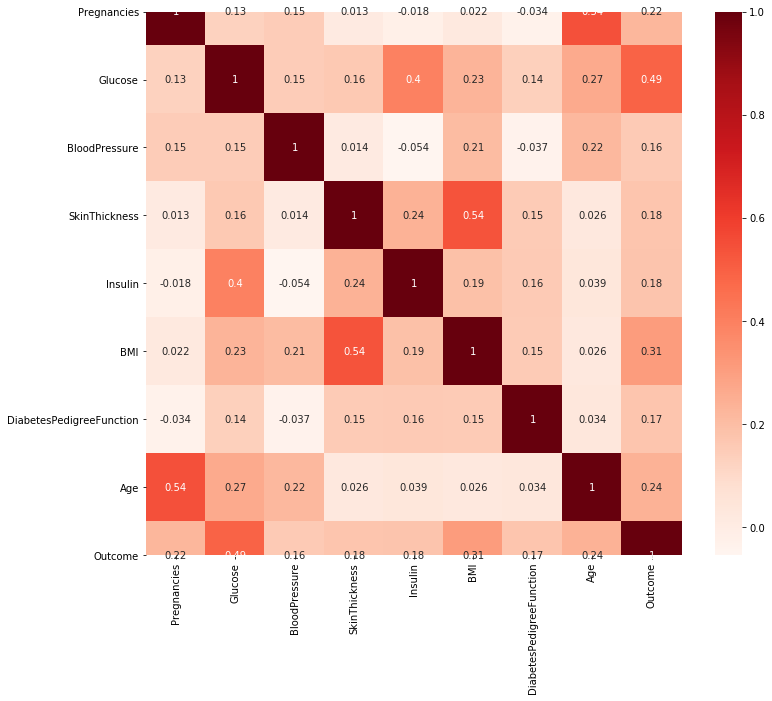

In [11]:
plt.figure(figsize=(12,10))
cor = hyper.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
corr_matrix = hyper.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Find features with correlation greater than 0.95

    
to_drop = [column for column in upper.columns if any(upper[column] > 0.50 )] 

   



#X=hyper.drop(['Age', 'Obese', 'bmi', 'wc', 'hc', 'whr', 'DBP'],1)
X1=hyper.drop(to_drop,axis=1,inplace=True)
print(hyper.columns)
# Drop features 
#print(hyper.columns)
#print("dimension of Hypertension data: {}".format(hyper.shape))
#print(hyper.groupby('hyper').size())



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')


In [6]:
LR= LogisticRegression()
KNN= KNeighborsClassifier()
CART= DecisionTreeClassifier()
NB= GaussianNB()
SVM= SVC(kernel='linear',random_state=42)
MLP=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=20,random_state=1)
DT=DecisionTreeClassifier(random_state=42)
RF=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,random_state=7)
def model(model,X_tr, X_te, y_tr, y_te):
    model.fit(X_tr,y_tr)
    predict=model.predict(X_te)
    mae = np.mean(abs(predict - y_te))
    print('MAE = %0.4f' % mae)
    confusion_matrix(y_te, predict)
    print('accuracy score',accuracy_score(y_te,predict)*100)
    print('Classification report \n')
    print(classification_report(y_te,predict))
    print("Train acc: ",accuracy_score(y_tr,model.predict(X_tr)))
    print("test acc: ",accuracy_score(y_te,predict))

In [8]:
from sklearn.model_selection import cross_val_score
def crossV(model,X,y):
    print("Cross Validation: ")
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy : " , accuracy)
    f1 = cross_val_score( model, X, y, cv=10, scoring='f1_macro').mean() * 100
    print("f1 : " , f1)

    recall = cross_val_score( model, X, y, cv=10, scoring='recall_macro').mean() * 100
    print("recall : " , recall)

    precision = cross_val_score( model, X, y, cv=10, scoring='precision_macro').mean() * 100
    print("precision : " , precision)

In [9]:
print("Logistic Regression:")
crossV(LR,X,y)
model(LR,X_train, X_test, y_train, y_test)
print("Suport Vector Machine:")
crossV(SVM,X,y)
model(SVM,X_train, X_test, y_train, y_test)
print("MLP:")
crossV(MLP,X,y)
model(MLP,X_train, X_test, y_train, y_test)
print("Naive Bayes:")
crossV(NB,X,y)
model(NB,X_train, X_test, y_train, y_test)
print(" KNN:")
crossV(KNN,X,y)
model(KNN,X_train, X_test, y_train, y_test)
print("Decision Tree :")
crossV(DT,X,y)
model(DT,X_train, X_test, y_train, y_test)
print("Random forest  :")
crossV(RF,X,y)
model(RF,X_train, X_test, y_train, y_test)
print("CART   :")
crossV(CART,X,y)
model(CART,X_train, X_test, y_train, y_test)

Logistic Regression:
Cross Validation: 
Accuracy :  76.43369788106631


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

f1 :  71.97341806691787
recall :  70.9105413105413


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

precision :  75.34905623443015
MAE = 0.2000
accuracy score 80.0
Classification report 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.75      0.60      0.67        10

    accuracy                           0.80        30
   macro avg       0.78      0.75      0.76        30
weighted avg       0.80      0.80      0.79        30

Train acc:  0.7696476964769647
test acc:  0.8
Suport Vector Machine:
Cross Validation: 
Accuracy :  76.43198906356801
f1 :  72.3127510440251
recall :  71.33646723646723
precision :  75.01316437948576
MAE = 0.2000
accuracy score 80.0
Classification report 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.70      0.70      0.70        10

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.80      0.80      0.80        30

T

/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't co

Accuracy :  52.751196172248804


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't co

f1 :  52.585625099801824


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't co

recall :  57.4954415954416


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't co

precision :  57.45099098948915
MAE = 0.4667
accuracy score 53.333333333333336
Classification report 

              precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30

Train acc:  0.5338753387533876
test acc:  0.5333333333333333
Naive Bayes:
Cross Validation: 
Accuracy :  74.47881066302118
f1 :  71.15445128974558
recall :  70.78062678062679
precision :  71.95527929522416
MAE = 0.2667
accuracy score 73.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.71      0.72      0.71        30
weighted avg       0.75